## 資料處理

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
data = pd.read_csv("Your data's location", index_col=0, parse_dates=True).dropna()

In [3]:
data

,收盤價(元)
年月日,
2008-01-02,35.93
2008-01-03,34.74
2008-01-04,35.11
2008-01-07,33.10
2008-01-08,34.51
...,...
2021-12-24,122.50
2021-12-27,122.50
2021-12-28,125.00


In [4]:
data.rename(columns={'收盤價(元)':'close'},inplace=True)
data.index.names = ['Date']
print(data)

             close
Date              
2008-01-02   35.93
2008-01-03   34.74
2008-01-04   35.11
2008-01-07   33.10
2008-01-08   34.51
...            ...
2021-12-24  122.50
2021-12-27  122.50
2021-12-28  125.00
2021-12-29  124.50
2021-12-30  121.00

[3454 rows x 1 columns]


In [5]:
data['SMA_42']=data['close'].rolling(42).mean()

In [6]:
data['SMA_252']=data['close'].rolling(252).mean()

In [7]:
data

,close,SMA_42,SMA_252
Date,,,
2008-01-02,35.93,NaN,NaN
2008-01-03,34.74,NaN,NaN
2008-01-04,35.11,NaN,NaN
2008-01-07,33.10,NaN,NaN
2008-01-08,34.51,NaN,NaN
...,...,...,...
2021-12-24,122.50,114.573810,91.330159
2021-12-27,122.50,115.333333,91.753373
2021-12-28,125.00,116.011905,92.187103


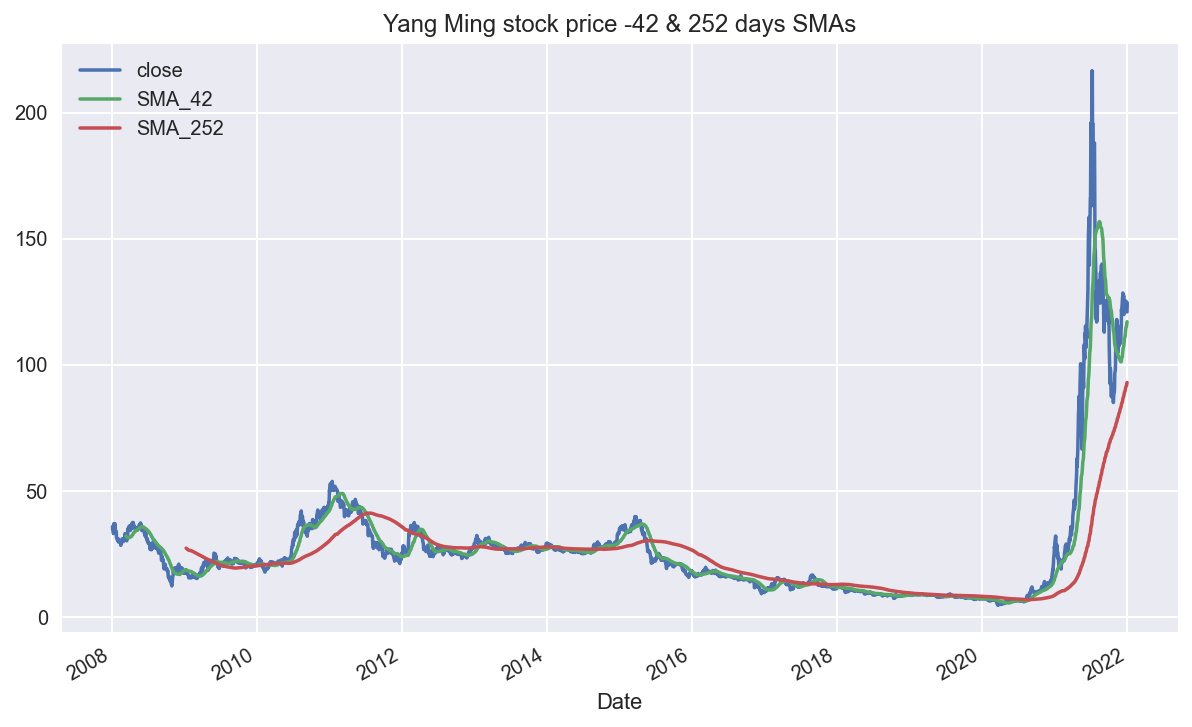

In [8]:
%config InlineBackend.figure_format = 'retina'#讓圖片變高清
data.plot(title='Yang Ming stock price -42 & 252 days SMAs',
          figsize=(10, 6));

## 推導部位

短期SMA在長期SMA上面時，做多；
短期SMA在長期SMA下面時，做空；

In [10]:
data['signal'] = np.where(data['SMA_42'] > data['SMA_252'], 1, -1)

In [11]:
data.dropna(inplace=True)

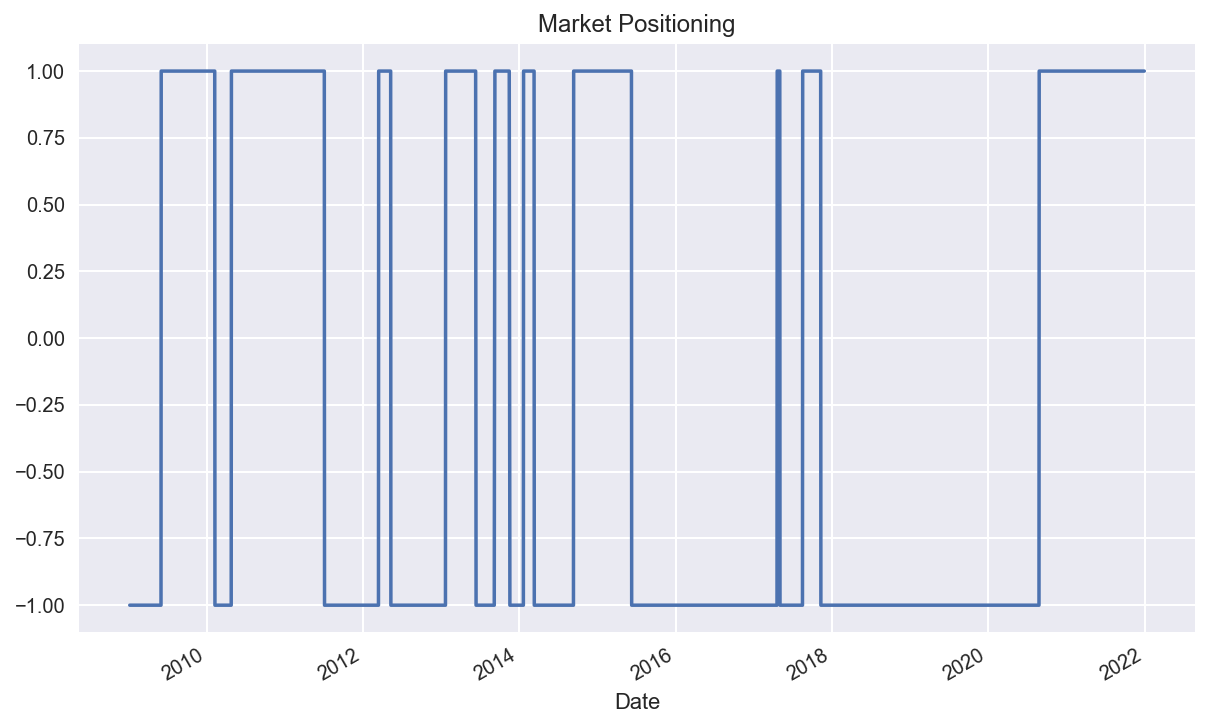

In [12]:
data['signal'].plot(ylim=[-1.1, 1.1],
                      title='Market Positioning',
                      figsize=(10, 6));

## 報酬率分布

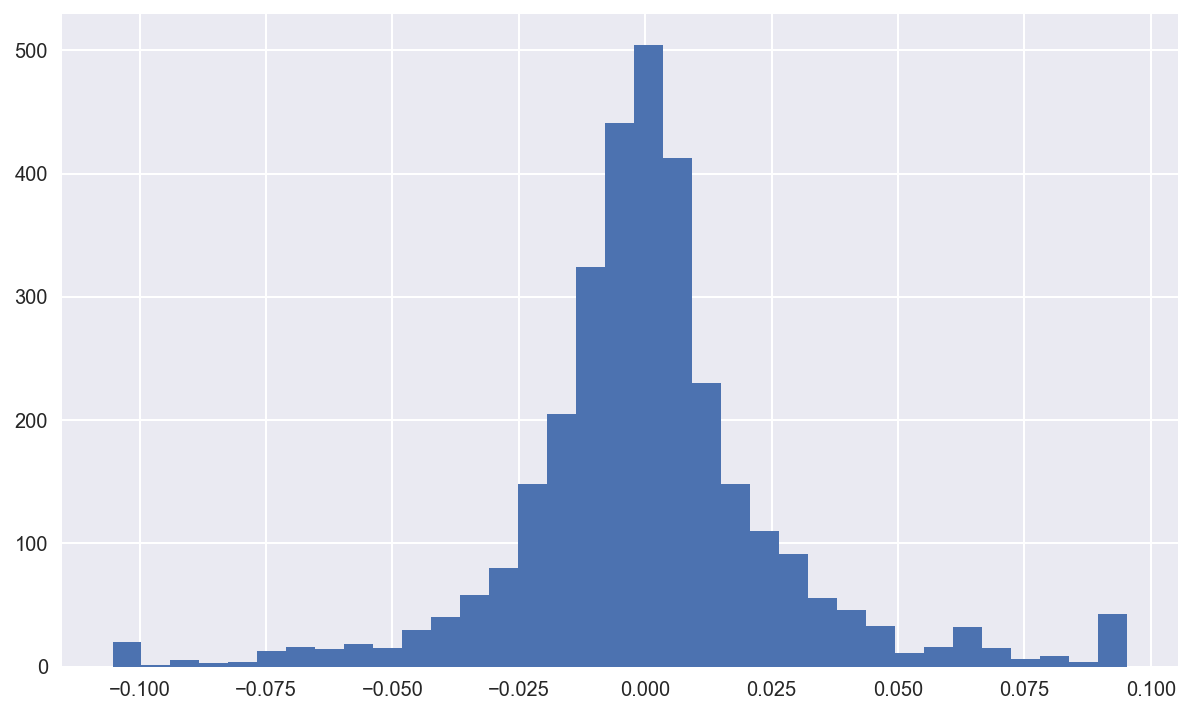

In [13]:
data['returns'] = np.log(data['close'] / data['close'].shift(1))
data['returns'].hist(bins=35, figsize=(10, 6));